Импортирование библиотек

In [444]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

Загрузка данных 'ferma_main.csv'

In [445]:
try:
    ferma_main=pd.read_csv('/datasets/ferma_main.csv', delimiter=';')
except FileNotFoundError:
    ferma_main=pd.read_csv('ferma_main.csv', delimiter=';')

Загрузка данных 'ferma_dad.csv'

In [446]:
try:
    ferma_dad=pd.read_csv('/datasets/ferma_dad.csv', delimiter=';')
except FileNotFoundError:
    ferma_dad=pd.read_csv('ferma_dad.csv', delimiter=';')

Загрузка данных 'cow_buy.csv'

In [447]:
try:
    cow_buy=pd.read_csv('/datasets/cow_buy.csv', delimiter=';')
except FileNotFoundError:
    cow_buy=pd.read_csv('cow_buy.csv', delimiter=';')

##  Предобработка данных

Просмотр информации о данных ferma_main

In [448]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Просмотр первых пяти строк в ferma_main

In [449]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


По данным можно сразу сказать, что столбик id лишний, явных пропусков нет, тип обьектов нужно поменять

Просмотр последних пяти строк в ferma_main

In [450]:
ferma_main.tail()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


Удаление столбца 'id' из данных

In [451]:
ferma_main.drop(columns=['id'], inplace=True)

Просмотр информации о данных ferma_dad

In [452]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


По данным можно сразу сказать, строк меньше чем в предыдущем датафрейме, явных пропусков нет, столбик id нужно удалить

Просмотр первых пяти строк в ferma_dad

In [453]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Просмотр последних пяти строк в ferma_dad

In [454]:
ferma_dad.tail()

,id,Имя Папы
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин
628,629,Соловчик


Удаление столбика 'id'

In [455]:
ferma_dad.drop(columns=['id'], inplace=True)

Проверка

In [456]:
ferma_dad.head()

,Имя Папы
0,Буйный
1,Соловчик
2,Барин
3,Буйный
4,Барин


Просмотр информации о данных cow_buy

In [457]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


По данным можно сразу сказать, что строк гораздо меньше чем в предыдущих данных, тип обьектов нужно поменять

Вывод всех строк cow_buy

In [458]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


Для дальнейшего редактирования данных выведем 10 первых строк данных

In [459]:
ferma_main.head(10)

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


Просмотр уникальных значений столбца 'ЭКЕ (Энергетическая кормовая единица)'

In [460]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'].unique()

array(['14,2', '12,8', '14', '12,4', '12,7', '13,2', '14,7', '13,4',
       '13,7', '16,5', '15,4', '14,5', '16', '15,6', '11,5', '15,7',
       '14,3', '15,5', '14,6', '15,9', '15,2', '14,8', '16,4', '11,8',
       '14,4', '16,1', '12,9', '13,8', '13,3', '16,3', '13,9', '14,1',
       '16,7', '15,8', '16,2', '12,2', '14,9', '13,6', '12,5', '16,8',
       '13,5', '15,1', '12,1', '16,6', '15,3', '13,1', '12,3', '11,9',
       '12,6', '15', '13', '12', '11,1', '11,7', '10,9'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [461]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'].str.replace(',', '.')
ferma_main['ЭКЕ (Энергетическая кормовая единица)']=ferma_main['ЭКЕ (Энергетическая кормовая единица)'].astype(float)

Просмотр уникальных значений столбца 'СПО (Сахаро-протеиновое соотношение)'

In [462]:
ferma_main['СПО (Сахаро-протеиновое соотношение)'].unique()

array(['0,89', '0,885', '0,93', '0,94', '0,895', '0,95', '0,96', '0,85',
       '0,84', '0,86', '0,88', '0,9'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [463]:
ferma_main['СПО (Сахаро-протеиновое соотношение)']=ferma_main['СПО (Сахаро-протеиновое соотношение)'].str.replace(',','.')
ferma_main['СПО (Сахаро-протеиновое соотношение)']=ferma_main['СПО (Сахаро-протеиновое соотношение)'].astype(float)

Просмотр уникальных значений столбца 'Жирность,%'

In [464]:
ferma_main['Жирность,%'].unique()

array(['3,58', '3,54', '3,59', '3,4', '3,73', '3,13', '3,48', '3,55',
       '3,71', '3,72', '3,61', '3,22', '3,03', '3,49', '3,31', '3,7',
       '3,74', '3,21', '3,11', '3,25', '3,34', '3,24', '3,53', '3,16',
       '3,26', '3,57', '3,44', '3,38', '3,18', '3,42', '3,62', '3,75',
       '3,41', '3,27', '3,63', '3,12', '3,64', '3,69', '3,37', '3,65',
       '3,33', '3,28', '3,35', '3,32', '3,23', '3,15', '3,01', '2,99',
       '3,39', '3,19'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [465]:
ferma_main['Жирность,%']=ferma_main['Жирность,%'].str.replace(',','.')
ferma_main['Жирность,%']=ferma_main['Жирность,%'].astype(float)

Просмотр уникальных значений столбца 'Белок,%'

In [466]:
ferma_main['Белок,%'].unique()

array(['3,076', '3,079', '3,074', '3,075', '3,073', '3,078', '3,077',
       '3,071', '3,08', '3,072', '3,081', '3,082', '3,07', '3,069',
       '3,085'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [467]:
ferma_main['Белок,%']=ferma_main['Белок,%'].str.replace(',','.')
ferma_main['Белок,%']=ferma_main['Белок,%'].astype(float)

Просмотр уникальных значений столбца 'Порода'

In [468]:
ferma_main['Порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Просмотр уникальных значений столбца 'Тип пастбища'

In [469]:
ferma_main['Тип пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

Удаление неявных дубликатов (замена названия 'Равнинные' на 'Равнинное') и вывод результата

In [470]:
ferma_main['Тип пастбища']=ferma_main['Тип пастбища'].str.replace('Равнинные','Равнинное')
ferma_main['Тип пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

Просмотр уникальных значений столбца 'порода папы_быка'

In [471]:
ferma_main['порода папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

Просмотр количества значений для определения как правильно писать Айдиал или Айдиалл

In [472]:
ferma_main['порода папы_быка'].value_counts()

Соверин    316
Айдиал     240
Айдиалл     78
Name: порода папы_быка, dtype: int64

Удаление неявных дубликатов (замена названия 'Айдиалл' на 'Айдиал') и вывод результата

In [473]:
ferma_main['порода папы_быка']=ferma_main['порода папы_быка'].str.replace('Айдиалл','Айдиал')
ferma_main['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Просмотр уникальных значений столбца 'Вкус молока'

In [474]:
ferma_main['Вкус молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

Просмотр уникальных значений столбца 'Возраст'

In [475]:
ferma_main['Возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Переименования столбцов

In [476]:
ferma_main.rename(columns={'Удой, кг':'удой_кг', 
                           'ЭКЕ (Энергетическая кормовая единица)':'энергетическая_кормовая_единица', 
                           'Сырой протеин, г':'сырой_протеин_г', 
                           'СПО (Сахаро-протеиновое соотношение)':'сахаро_протеиновое_соотношение', 
                           'Порода':'порода', 
                           'Тип пастбища':'тип_пастбища', 
                           'порода папы_быка':'порода_папы_быка',
                           'Жирность,%':'процент_жирности',
                           'Белок,%':'процент_белка',
                           'Вкус молока':'вкус_молока',
                           'Возраст':'возраст'
                          }, inplace=True)

Вывод результатов проделанных изменений с таблицой 'ferma_main'

In [477]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   удой_кг                          634 non-null    int64  
 1   энергетическая_кормовая_единица  634 non-null    float64
 2   сырой_протеин_г                  634 non-null    int64  
 3   сахаро_протеиновое_соотношение   634 non-null    float64
 4   порода                           634 non-null    object 
 5   тип_пастбища                     634 non-null    object 
 6   порода_папы_быка                 634 non-null    object 
 7   процент_жирности                 634 non-null    float64
 8   процент_белка                    634 non-null    float64
 9   вкус_молока                      634 non-null    object 
 10  возраст                          634 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 54.6+ KB


Вывод таблицы 'ferma_dad' для обнаружения явных проблем

In [478]:
ferma_dad

,Имя Папы
0,Буйный
1,Соловчик
2,Барин
3,Буйный
4,Барин
...,...
624,Буйный
625,Барин
626,Барин
627,Барин


Переименования столбца 'Имя Папы' на 'имя_папы'

In [479]:
ferma_dad.rename(columns={'Имя Папы':'имя_папы'}, inplace=True)

Прсмотр уникальных значений

In [480]:
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Вывод таблицы 'cow_buy' для дальшейшей работы с ней

In [481]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


Вывод уникальных значений в столбце 'Текущая_жирность,%'

In [482]:
cow_buy['Текущая_жирность,%'].unique()

array(['3,58', '3,54', '3,59', '3,4', '3,64', '3,63', '3,57', '3,73',
       '3,68', '3,42', '3,77', '3,34'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [483]:
cow_buy['Текущая_жирность,%']=cow_buy['Текущая_жирность,%'].str.replace(',','.')
cow_buy['Текущая_жирность,%']=cow_buy['Текущая_жирность,%'].astype(float)

Вывод уникальных значений в столбце 'Текущий_уровень_белок,%'

In [484]:
cow_buy['Текущий_уровень_белок,%'].unique()

array(['3,076', '3,081', '3,074', '3,061', '3,053', '3,079', '3,055',
       '3,073', '3,046', '3,075', '3,065', '3,069'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [485]:
cow_buy['Текущий_уровень_белок,%']=cow_buy['Текущий_уровень_белок,%'].str.replace(',','.')
cow_buy['Текущий_уровень_белок,%']=cow_buy['Текущий_уровень_белок,%'].astype(float)

Вывод уникальных значений в столбце 'Порода'

In [486]:
cow_buy['Порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Вывод уникальных значений в столбце 'Тип пастбища'

In [487]:
cow_buy['Тип пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

Вывод уникальных значений в столбце 'порода папы_быка'

In [488]:
cow_buy['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Вывод уникальных значений в столбце 'имя папы'

In [489]:
cow_buy['Имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

Вывод уникальных значений в столбце 'Возраст'

In [490]:
cow_buy['Возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Переименование столбцов

In [491]:
cow_buy.rename(columns={'Порода':'порода', 
                           'Тип пастбища':'тип_пастбища', 
                           'порода папы_быка':'порода_папы_быка', 
                           'Имя_папы':'имя_папы',
                           'Текущая_жирность,%':'процент_жирности',
                           'Текущий_уровень_белок,%':'процент_белка',
                           'Возраст':'возраст'
                          }, inplace=True)

Вывод информации после проделанной работы

In [492]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   порода            20 non-null     object 
 1   тип_пастбища      20 non-null     object 
 2   порода_папы_быка  20 non-null     object 
 3   имя_папы          20 non-null     object 
 4   процент_жирности  20 non-null     float64
 5   процент_белка     20 non-null     float64
 6   возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Количество дубликатов в 'ferma_main'

In [493]:
ferma_main.duplicated().sum()

5

Удаление дубликатов

In [494]:
ferma_maina=ferma_main.drop_duplicates()

Количество дубликатов в 'cow_buy'

In [495]:
cow_buy.duplicated().sum()

4

Удаление дубликатов

In [496]:
cow_buy=cow_buy.drop_duplicates()

Количество дубликатов в 'ferma_dad'

In [497]:
ferma_dad.duplicated().sum()

625

Могу предположить что это дубликаты которые не надо удалять

In [498]:
ferma_dad

,имя_папы
0,Буйный
1,Соловчик
2,Барин
3,Буйный
4,Барин
...,...
624,Буйный
625,Барин
626,Барин
627,Барин


## Исследовательский анализ данных

Выведем описательную статистику 'ferma_main'

In [499]:
ferma_main.describe()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,процент_жирности,процент_белка
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Можно заметить большой выброс в столбце 'удой'

Выведем описательную статистику 'cow_buy'

In [500]:
cow_buy.describe()

,процент_жирности,процент_белка
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


Построим боксплот для столбца 'удой'

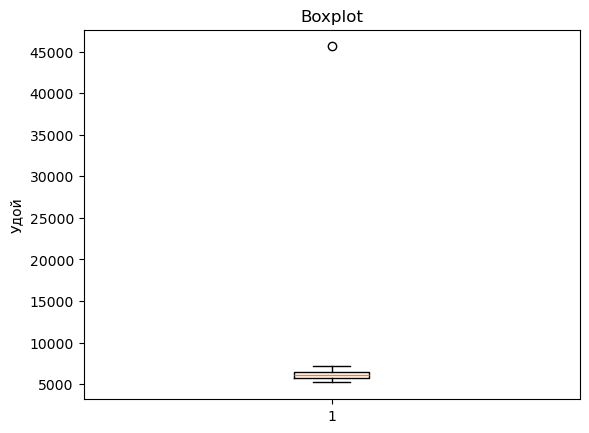

In [501]:
plt.boxplot(ferma_main['удой_кг'])
plt.title('Boxplot')
plt.ylabel('Удой');

Так же можно заметить выюрос в данных

Просмотр уникальных значений

In [502]:
ferma_main['удой_кг'].sort_values(ascending=False)

16     45616
70      7222
135     7207
296     7201
294     7197
       ...  
578     5235
322     5215
589     5213
397     5207
273     5204
Name: удой_кг, Length: 634, dtype: int64

Просмотр строчки с выбросом

In [503]:
ferma_maina.loc[ferma_main['удой_кг']==45616]

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст
16,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Удалим данную строчку

In [504]:
ferma_main=ferma_maina.loc[ferma_main['удой_кг']!=45616]

Выведем результат

In [505]:
ferma_main['удой_кг'].sort_values(ascending=False)

70     7222
135    7207
296    7201
294    7197
593    7174
       ... 
578    5235
322    5215
589    5213
397    5207
273    5204
Name: удой_кг, Length: 628, dtype: int64

построим боксплот для столбика 'удой_кг' для просмотра изменений

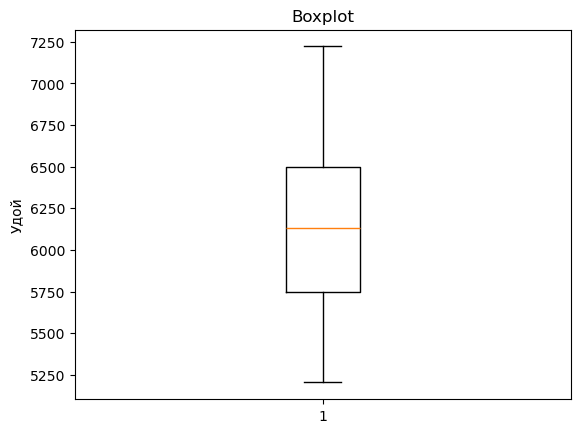

In [506]:
plt.boxplot(ferma_main['удой_кг'])
plt.title('Boxplot')
plt.ylabel('Удой');

Построим гистограмму для наглядного представления данных

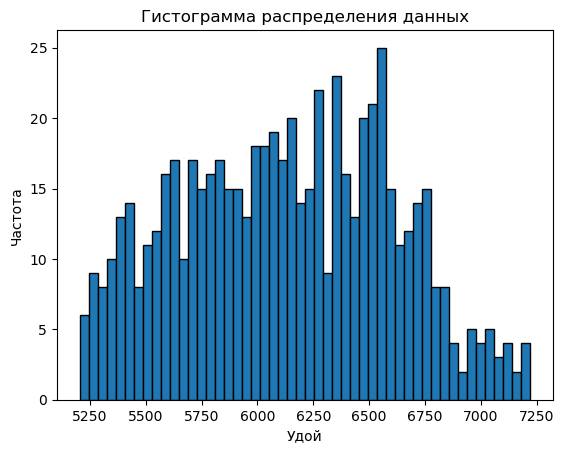

In [507]:
plt.hist(ferma_main['удой_кг'], bins=50, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Удой')
plt.ylabel('Частота');

Построим боксплот для стобца 'энергетическая_кормовая_единица'

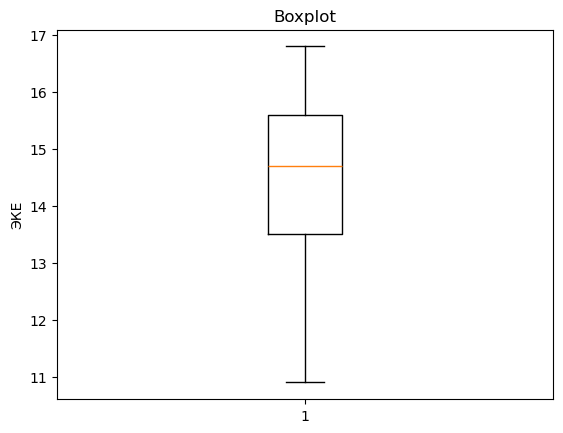

In [508]:
plt.boxplot(ferma_main['энергетическая_кормовая_единица'])
plt.title('Boxplot')
plt.ylabel('ЭКЕ');

Построим гистограмму для наглядного представления данных

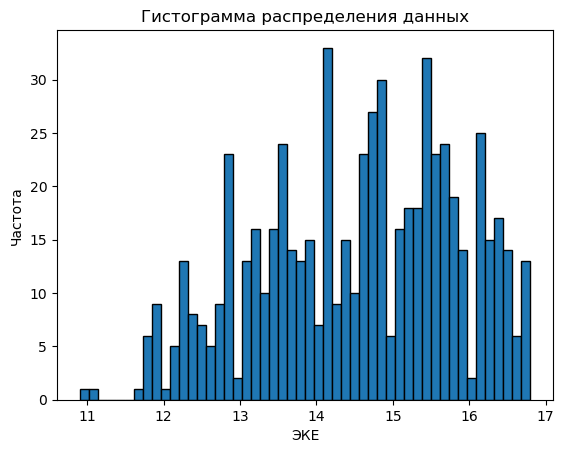

In [509]:
plt.hist(ferma_main['энергетическая_кормовая_единица'], bins=50, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('ЭКЕ')
plt.ylabel('Частота');

Построим боксплот для стобца 'сырой_протеин_г'

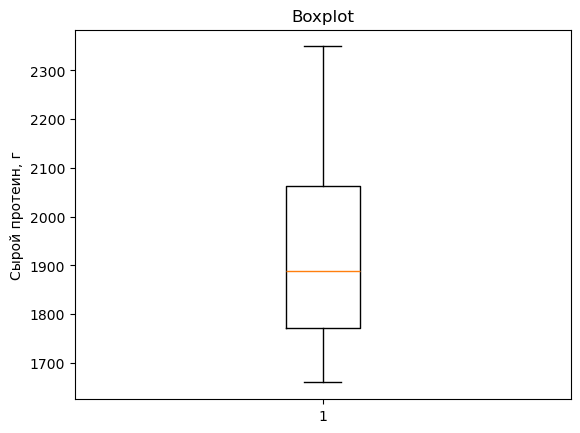

In [510]:
plt.boxplot(ferma_main['сырой_протеин_г'])
plt.title('Boxplot')
plt.ylabel('Сырой протеин, г');

Построим гистограмму для наглядного представления данных

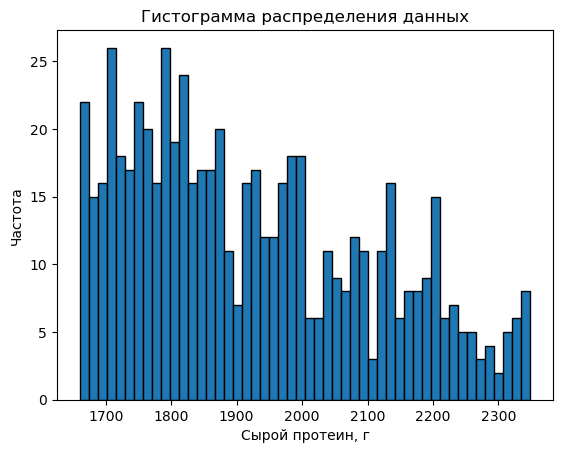

In [511]:
plt.hist(ferma_main['сырой_протеин_г'], bins=50, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Частота');

Построим боксплот для стобца 'сахаро_протеиновое_соотношение'

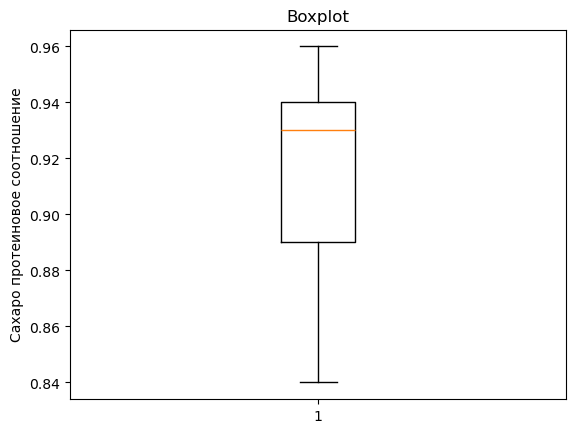

In [512]:
plt.boxplot(ferma_main['сахаро_протеиновое_соотношение'])
plt.title('Boxplot')
plt.ylabel('Сахаро протеиновое соотношение');

Построим гистограмму для наглядного представления данных

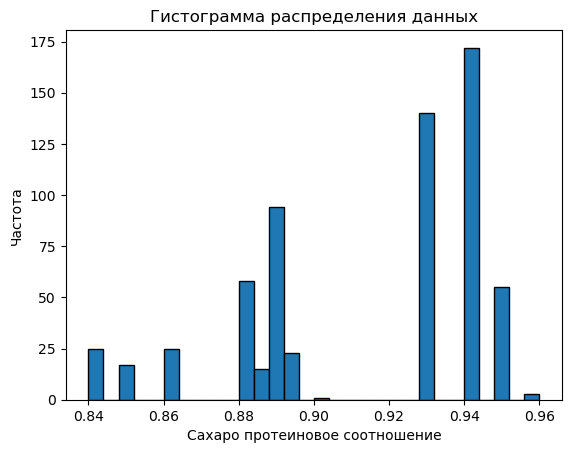

In [513]:
plt.hist(ferma_main['сахаро_протеиновое_соотношение'], bins=30, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Сахаро протеиновое соотношение')
plt.ylabel('Частота');

Построим диаграмму для вывода процентного соотношения столбца 'порода'

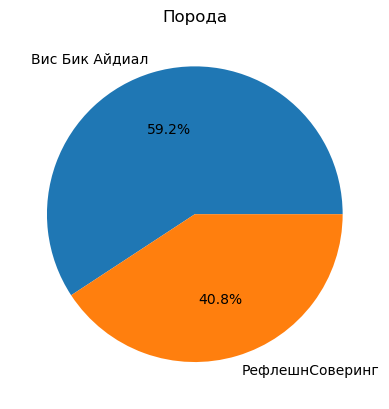

In [514]:
circle=ferma_main['порода'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Порода');

Построим диаграмму для вывода процентного соотношения столбца 'тип_пастбища'

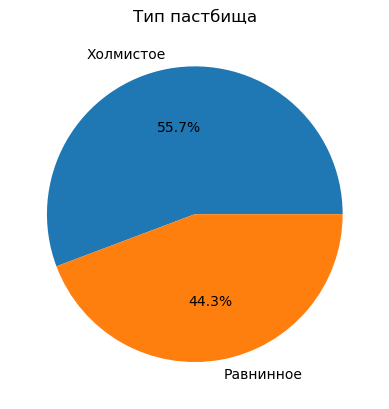

In [515]:
circle=ferma_main['тип_пастбища'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Тип пастбища');

Построим диаграмму для вывода процентного соотношения столбца 'порода_папы_быка'

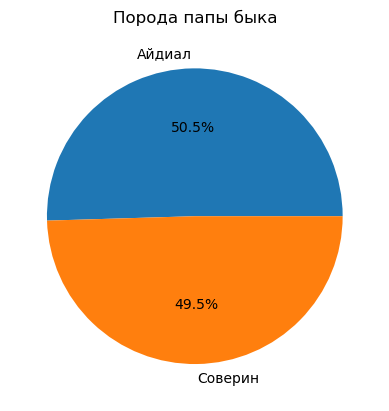

In [516]:
circle=ferma_main['порода_папы_быка'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Порода папы быка');

Построим боксплот для стобца 'процент_жирности'

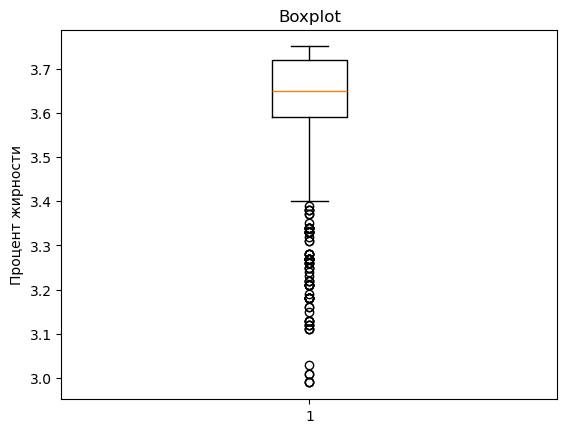

In [517]:
plt.boxplot(ferma_main['процент_жирности'])
plt.title('Boxplot')
plt.ylabel('Процент жирности');

Построим гистограмму для наглядного представления данных

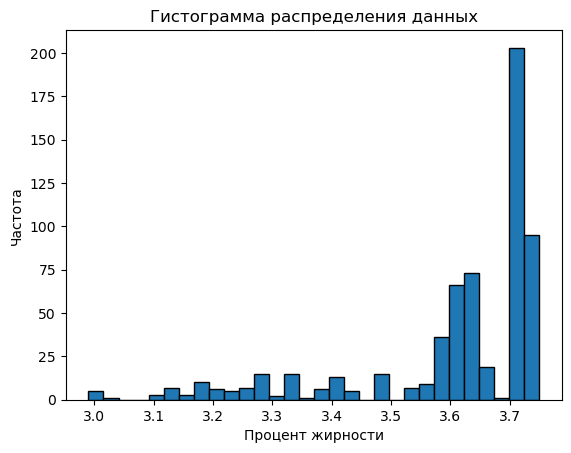

In [518]:
plt.hist(ferma_main['процент_жирности'], bins=30, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Процент жирности')
plt.ylabel('Частота');

Построим боксплот для стобца 'процент_белка'

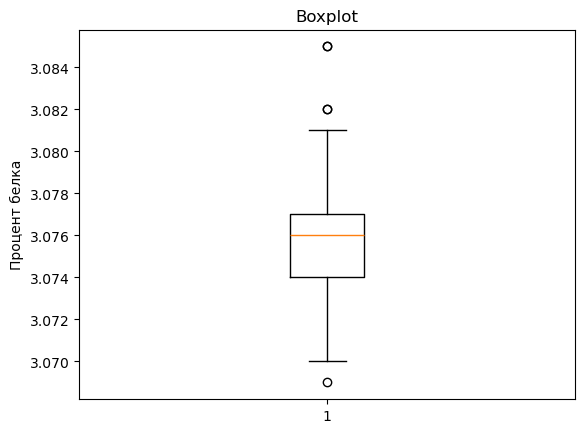

In [519]:
plt.boxplot(ferma_main['процент_белка'])
plt.title('Boxplot')
plt.ylabel('Процент белка');

Построим гистограмму для наглядного представления данных

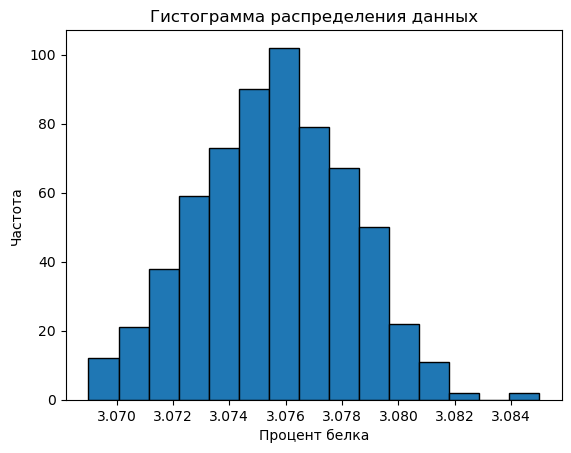

In [520]:
plt.hist(ferma_main['процент_белка'], bins=15, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Процент белка')
plt.ylabel('Частота');

Построим диаграмму для вывода процентного соотношения столбца 'вкус_молока'

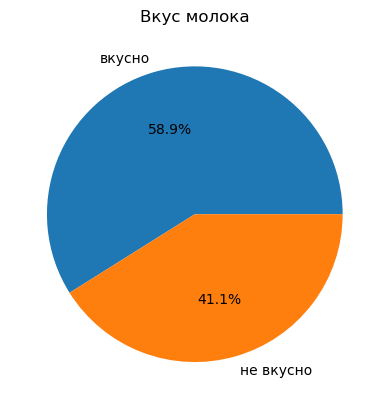

In [521]:
circle=ferma_main['вкус_молока'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Вкус молока');

Построим диаграмму для вывода процентного соотношения столбца 'возраст'

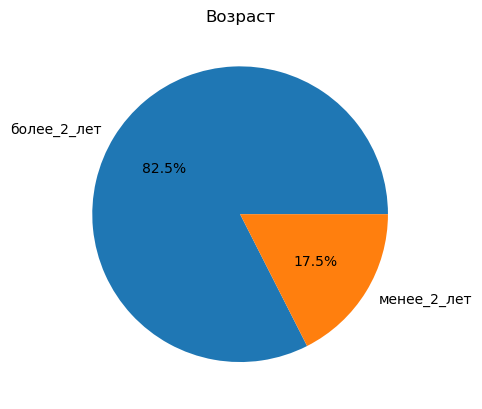

In [522]:
circle=ferma_main['возраст'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Возраст');

## Корреляционный анализ

In [523]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   удой_кг                          628 non-null    int64  
 1   энергетическая_кормовая_единица  628 non-null    float64
 2   сырой_протеин_г                  628 non-null    int64  
 3   сахаро_протеиновое_соотношение   628 non-null    float64
 4   порода                           628 non-null    object 
 5   тип_пастбища                     628 non-null    object 
 6   порода_папы_быка                 628 non-null    object 
 7   процент_жирности                 628 non-null    float64
 8   процент_белка                    628 non-null    float64
 9   вкус_молока                      628 non-null    object 
 10  возраст                          628 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 58.9+ KB


In [528]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   удой_кг                          628 non-null    int64  
 1   энергетическая_кормовая_единица  628 non-null    float64
 2   сырой_протеин_г                  628 non-null    int64  
 3   сахаро_протеиновое_соотношение   628 non-null    float64
 4   порода                           628 non-null    object 
 5   тип_пастбища                     628 non-null    object 
 6   порода_папы_быка                 628 non-null    object 
 7   процент_жирности                 628 non-null    float64
 8   процент_белка                    628 non-null    float64
 9   вкус_молока                      628 non-null    object 
 10  возраст                          628 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 58.9+ KB


In [541]:
ferma_main.corr()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,процент_жирности,процент_белка
удой_кг,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
энергетическая_кормовая_единица,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
сырой_протеин_г,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
сахаро_протеиновое_соотношение,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
процент_жирности,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
процент_белка,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


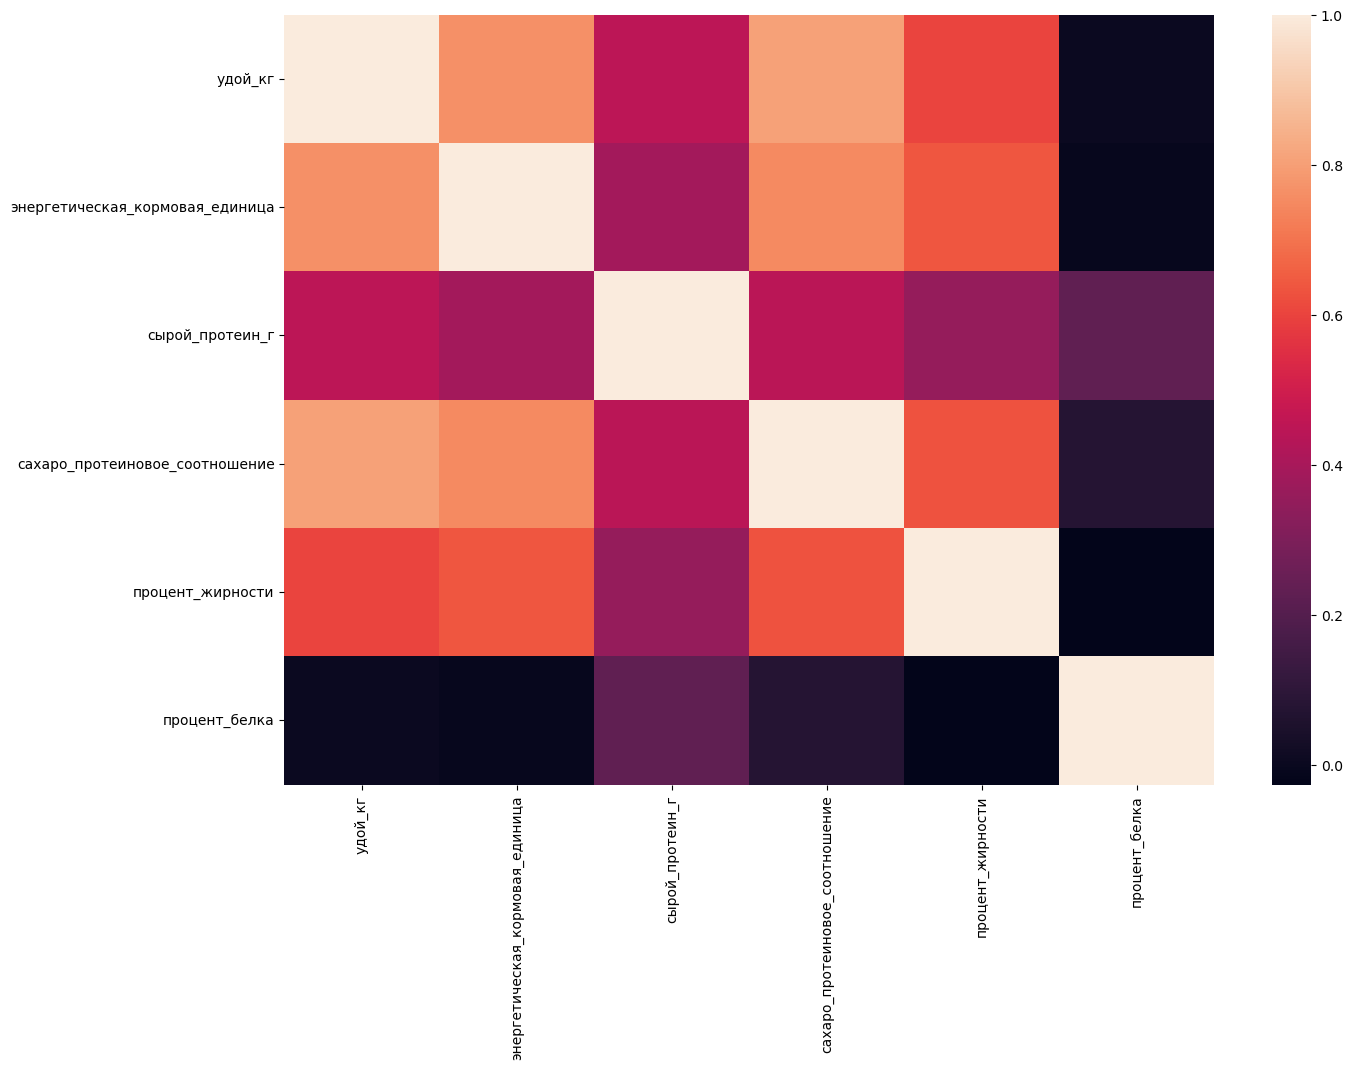

In [546]:
plt.figure(figsize = (15,10))
sns.heatmap(ferma_main.corr());

Text(0.5, 1.0, 'Scatter Plot Example 3')

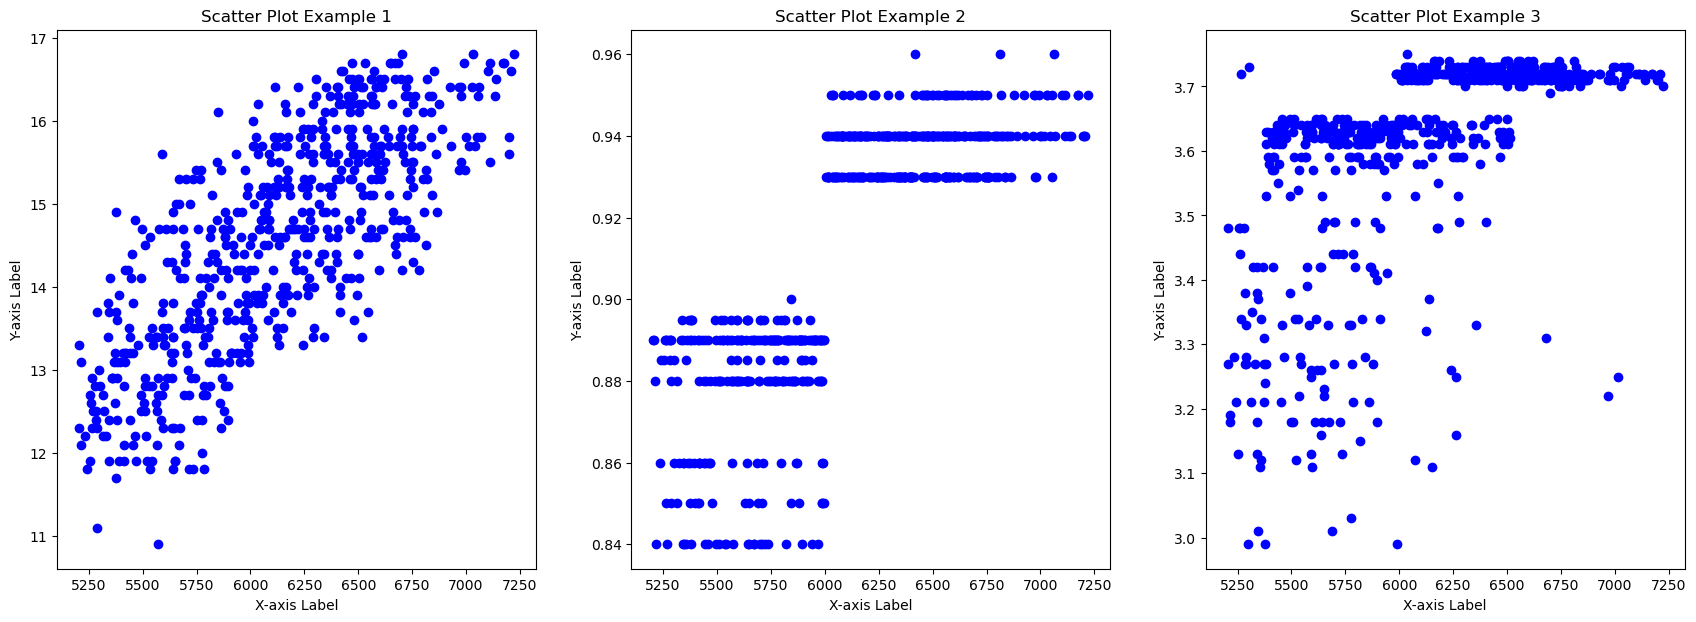

In [565]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# Первый график
axs[0].scatter(ferma_main['удой_кг'], ferma_main['энергетическая_кормовая_единица'], c='blue')
axs[0].set_xlabel('X-axis Label')
axs[0].set_ylabel('Y-axis Label')
axs[0].set_title('Scatter Plot Example 1')

# Второй график
axs[1].scatter(ferma_main['удой_кг'], ferma_main['сахаро_протеиновое_соотношение'], c='blue')
axs[1].set_xlabel('X-axis Label')
axs[1].set_ylabel('Y-axis Label')
axs[1].set_title('Scatter Plot Example 2')

# Третий график
axs[2].scatter(ferma_main['удой_кг'], ferma_main['процент_жирности'], c='blue')
axs[2].set_xlabel('X-axis Label')
axs[2].set_ylabel('Y-axis Label')
axs[2].set_title('Scatter Plot Example 3')

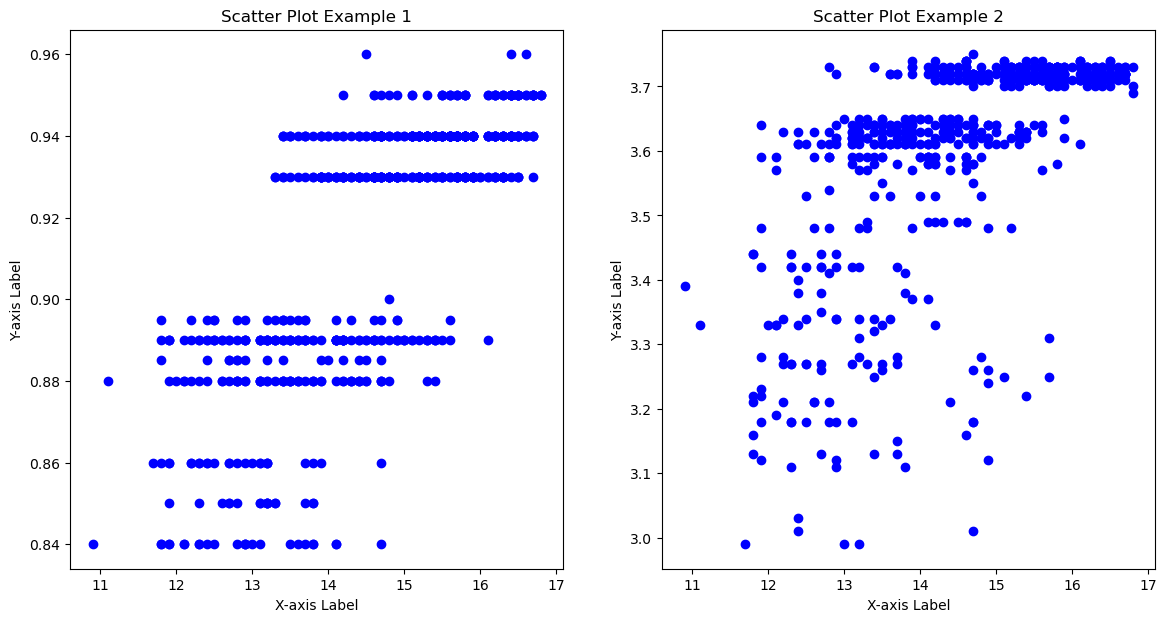

In [567]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Первый график
axs[0].scatter(ferma_main['энергетическая_кормовая_единица'], ferma_main['сахаро_протеиновое_соотношение'], c='blue')
axs[0].set_xlabel('X-axis Label')
axs[0].set_ylabel('Y-axis Label')
axs[0].set_title('Scatter Plot Example 1')

# Второй график
axs[1].scatter(ferma_main['энергетическая_кормовая_единица'], ferma_main['процент_жирности'], c='blue')
axs[1].set_xlabel('X-axis Label')
axs[1].set_ylabel('Y-axis Label')
axs[1].set_title('Scatter Plot Example 2');

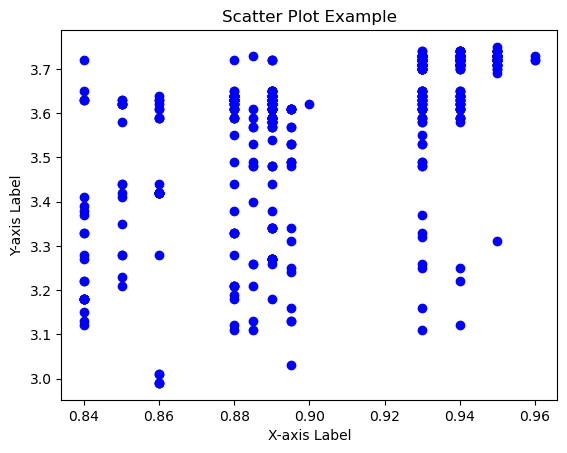

In [570]:
plt.scatter(ferma_main['сахаро_протеиновое_соотношение'], ferma_main['процент_жирности'], c='blue')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example');

<b>Нужно сделать:</b>

    1) Поменять на графиках название
    2) Добавить описание 
    3) Выводы дописать (пока не надо)

## Обучение модели линейной регрессии

## Обучение модели логистической регрессии

## Итоговые выводы